In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.load_data import fetch_binance_futures_data


---
### 시간봉


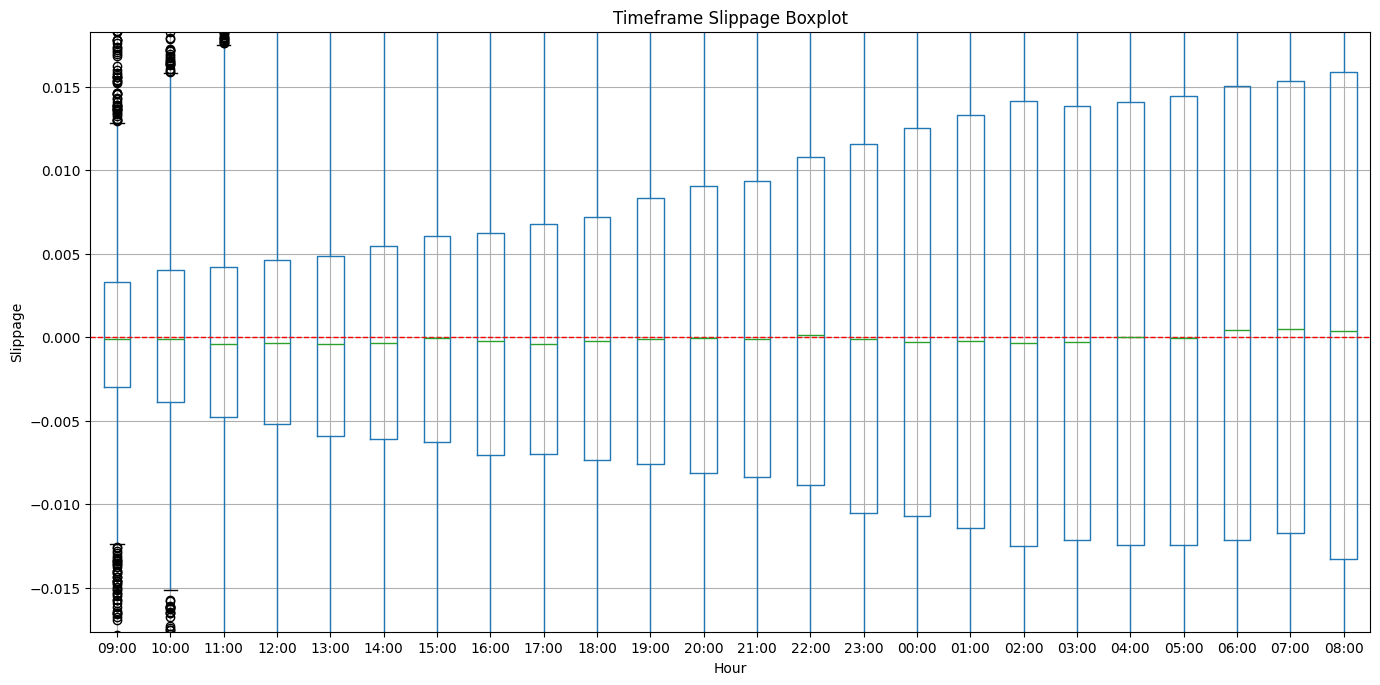

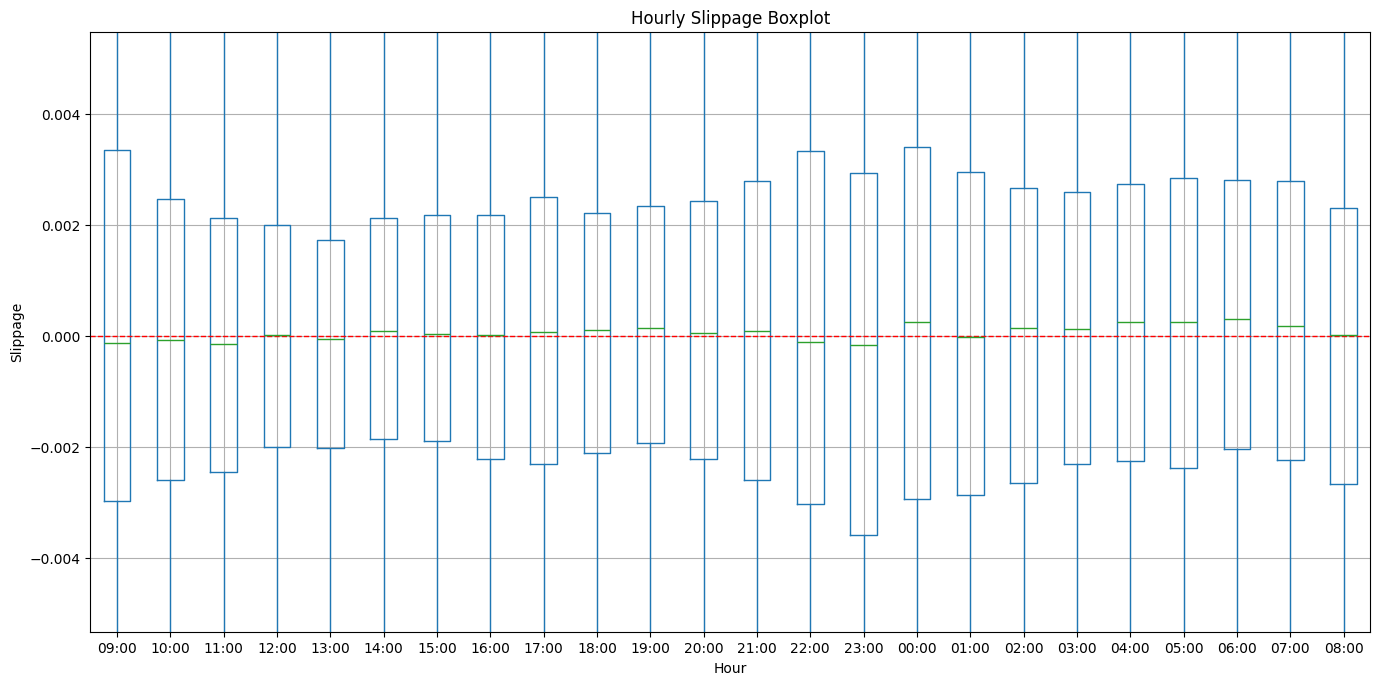

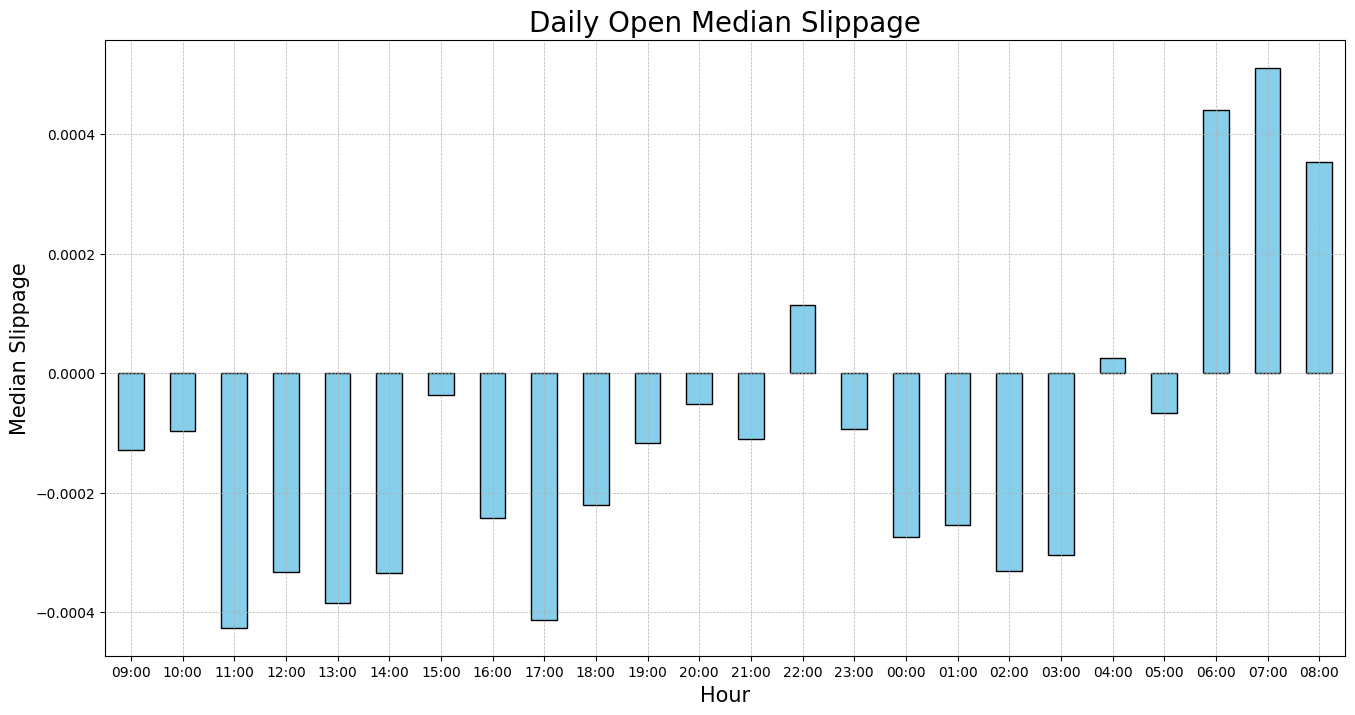

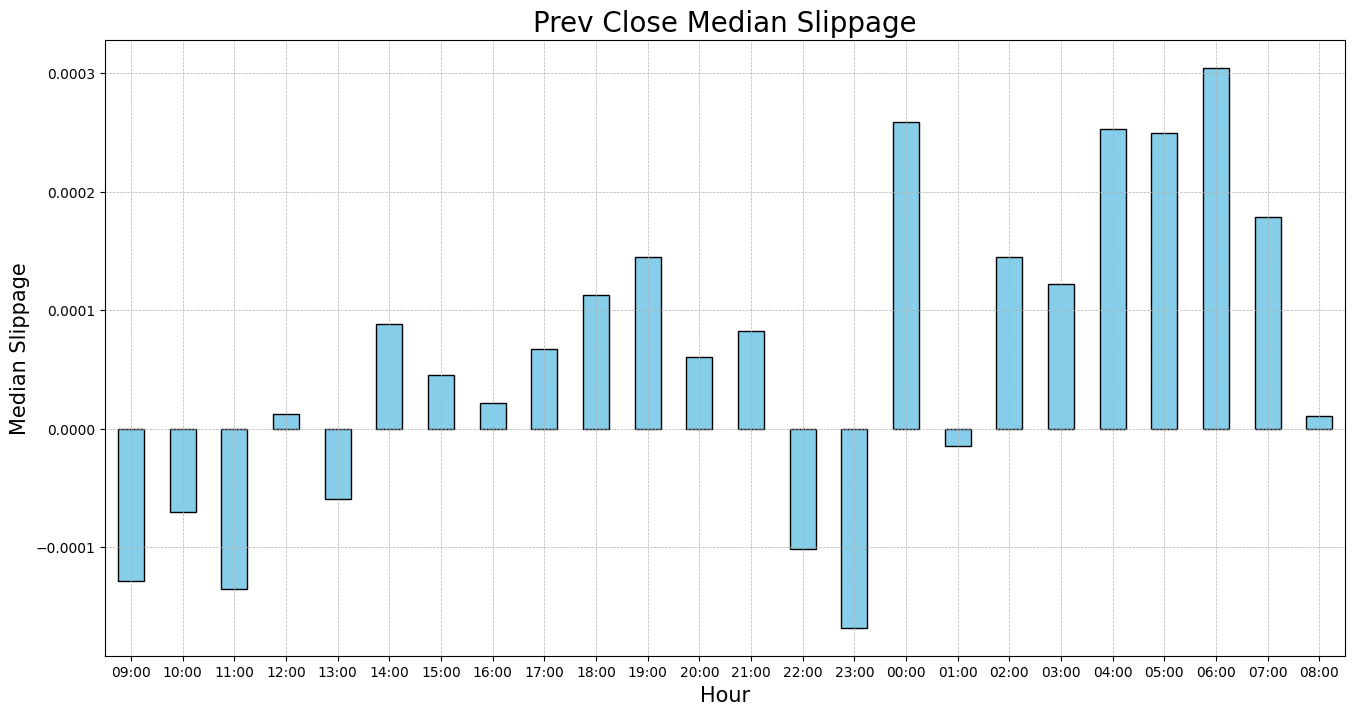

In [4]:
df = fetch_binance_futures_data("BTCUSDT", '1h')

df['returns'] = df['Close'].pct_change()
df['prev_Close'] = df['Close'].shift(1)

df['day'] = df.index.day
df['hour'] = df.index.hour
df['minute'] = df.index.minute

except_date = (df.index[0].date() + pd.Timedelta(days=1)).strftime('%Y-%m-%d')
df = df.loc[except_date:]

df = pd.merge(df, df['Open'].resample('1d').first().rename('daily_open'), left_index=True, right_index=True, how='left').ffill()

# close - daily_open
df['daily_open_slippage'] = (df['Close'] - df['daily_open'])/df['daily_open']

# close - prev_close
df['prev_close_slippage'] = (df['Close'] - df['prev_Close'])/df['prev_Close']

def plot_slippage_boxplot(df, column_name, title):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 0.6 * iqr
    upper_bound = q3 + 0.6 * iqr

    df.boxplot(column=column_name, by='hour', figsize=(16, 8))
    plt.ylim(lower_bound, upper_bound)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
    plt.title(title)
    plt.suptitle('')
    plt.xlabel('Hour')
    plt.ylabel('Slippage')
    plt.xticks(ticks=range(1, 25), labels=[f'{(h+9)%24:02d}:00' for h in range(24)], rotation=0)  # KTC 시간으로 변경
    plt.show()

# 시간별 슬리피지 박스플랏
plot_slippage_boxplot(df, 'daily_open_slippage', 'Timeframe Slippage Boxplot')
plot_slippage_boxplot(df, 'prev_close_slippage', 'Hourly Slippage Boxplot')

def plot_median_slippage(df, column_name, title):
    ax = df.groupby('hour')[column_name].median().plot(kind='bar', figsize=(16, 8), color='skyblue', edgecolor='black')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Hour', fontsize=15)
    ax.set_ylabel('Median Slippage', fontsize=15)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(ticks=range(0, 24), labels=[f'{(h+9)%24:02d}:00' for h in range(24)], rotation=0)  # KTC 시간으로 변경
    plt.show()

# median값들만
plot_median_slippage(df, 'daily_open_slippage', 'Daily Open Median Slippage')
plot_median_slippage(df, 'prev_close_slippage', 'Prev Close Median Slippage')


---
### 30분봉

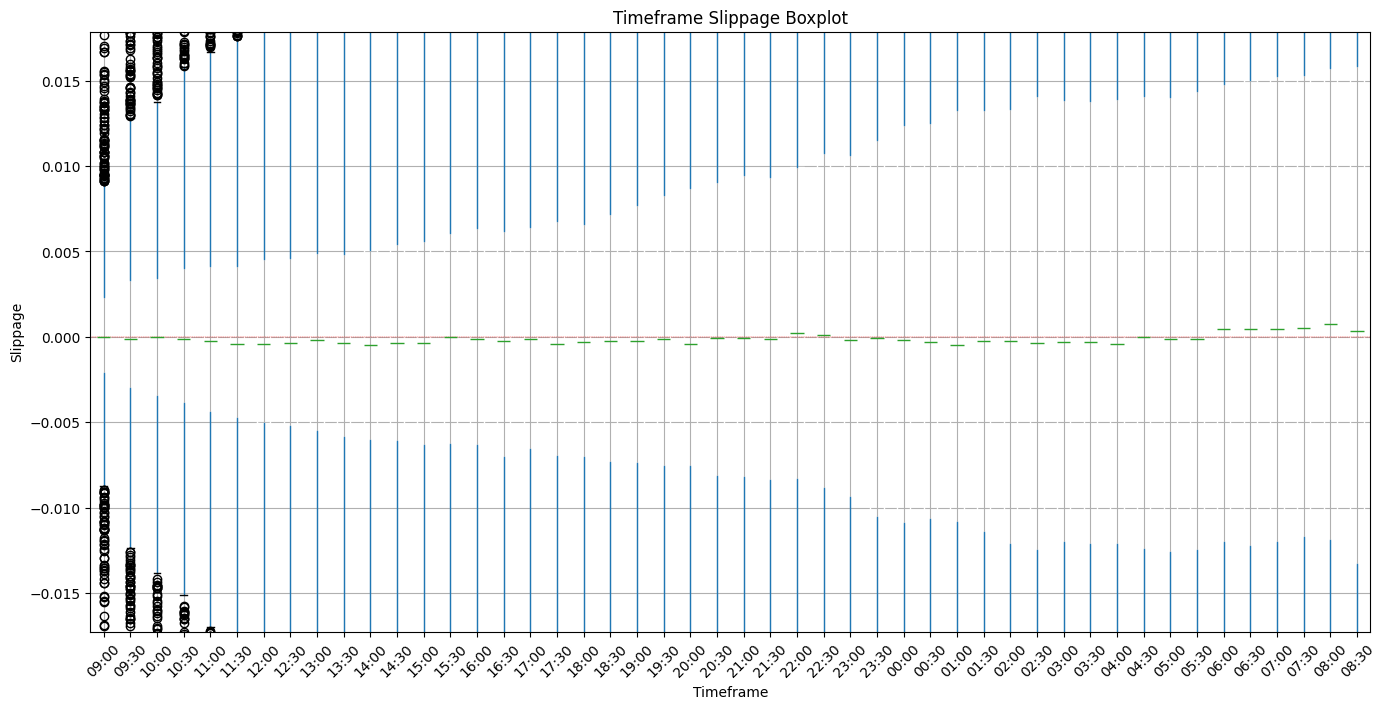

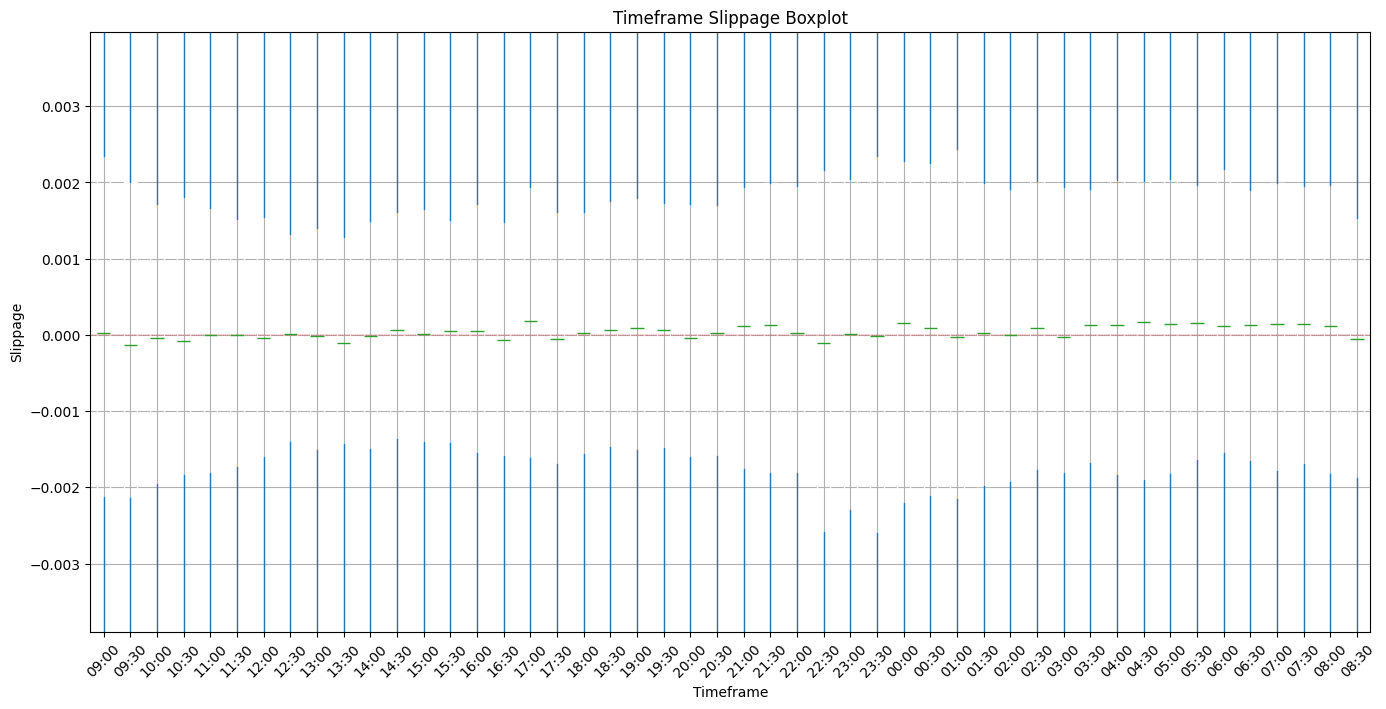

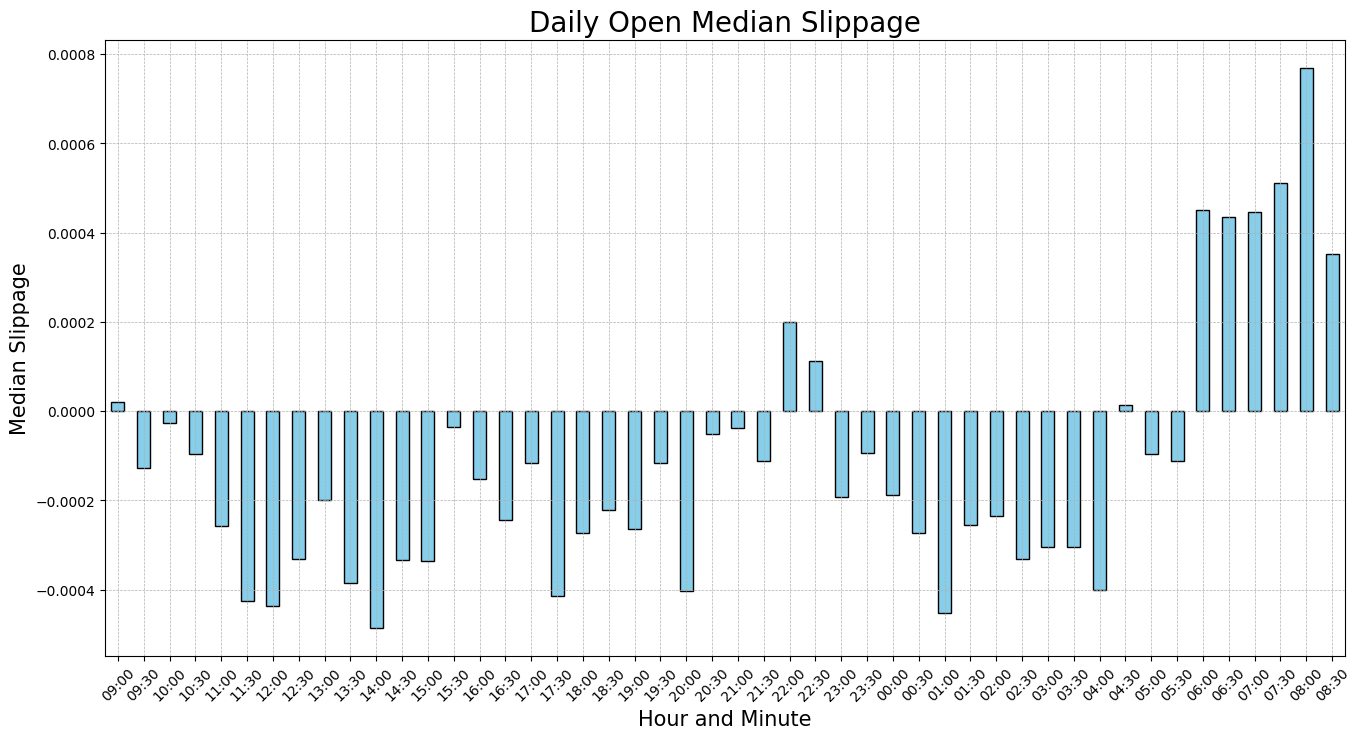

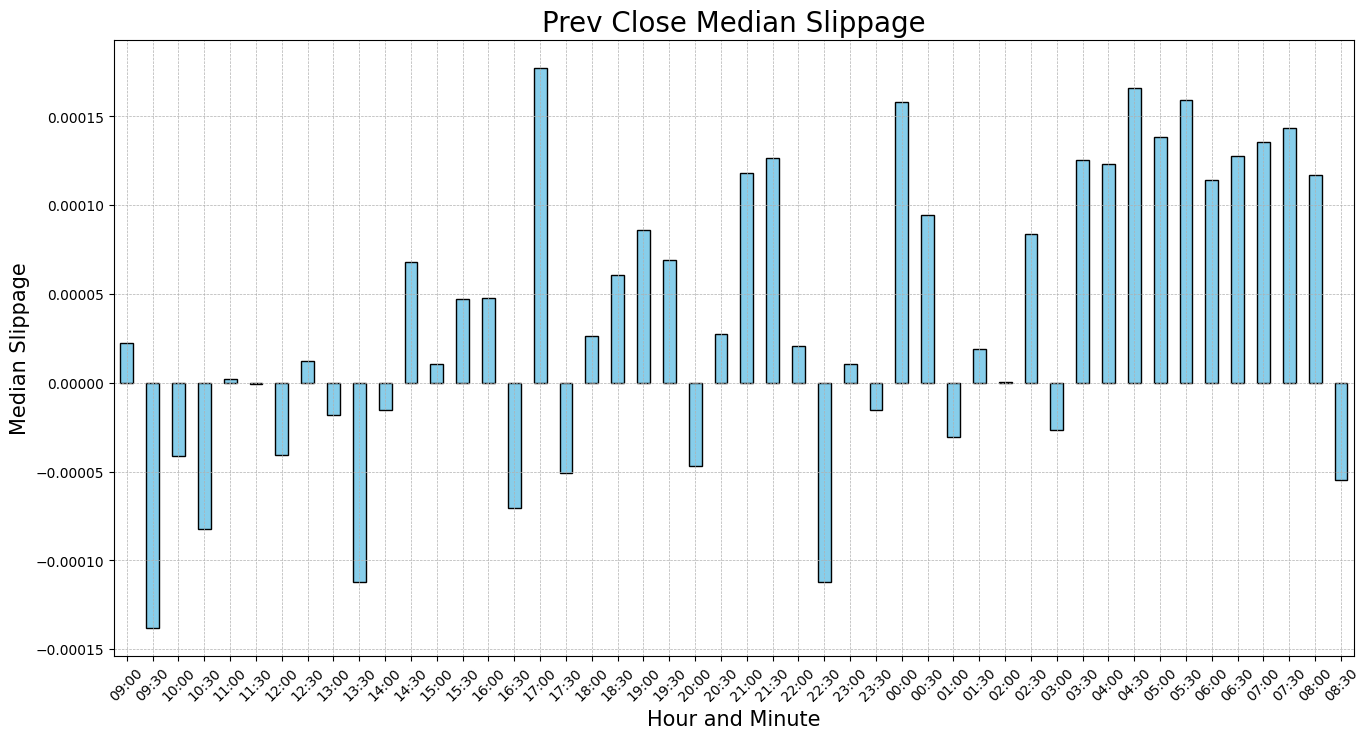

In [5]:
df = fetch_binance_futures_data("BTCUSDT", '30m')

df['returns'] = df['Close'].pct_change()
df['prev_Close'] = df['Close'].shift(1)

df['day'] = df.index.day
df['hour'] = df.index.hour
df['minute'] = df.index.minute

except_date = (df.index[0].date() + pd.Timedelta(days=1)).strftime('%Y-%m-%d')
df = df.loc[except_date:]

df = pd.merge(df, df['Open'].resample('1d').first().rename('daily_open'), left_index=True, right_index=True, how='left').ffill()

# close - daily_open
df['daily_open_slippage'] = (df['Close'] - df['daily_open'])/df['daily_open']

# close - prev_close
df['prev_close_slippage'] = (df['Close'] - df['prev_Close'])/df['prev_Close']

# 30분봉
def plot_slippage_boxplot(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 0.6 * iqr
    upper_bound = q3 + 0.6 * iqr

    df.boxplot(column=column_name, by=['hour', 'minute'], figsize=(16, 8), boxprops=dict(color='white'))
    plt.ylim(lower_bound, upper_bound)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=0.3)
    plt.title("Timeframe Slippage Boxplot")
    plt.suptitle('')
    plt.xlabel('Timeframe')
    plt.ylabel('Slippage')
    plt.xticks(ticks=range(1, 49), labels=[f'{((h//60)+9)%24:02d}:{h%60:02d}' for h in range(0, 1440, 30)], rotation=45)  # KTC 시간으로 변경
    plt.show()

plot_slippage_boxplot(df, 'daily_open_slippage')
plot_slippage_boxplot(df, 'prev_close_slippage')

def plot_median_slippage(df, column_name, title):
    ax = df.groupby(['hour', 'minute'])[column_name].median().plot(kind='bar', figsize=(16, 8), color='skyblue', edgecolor='black')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Hour and Minute', fontsize=15)
    ax.set_ylabel('Median Slippage', fontsize=15)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(ticks=range(0, 48), labels=[f'{((h//60)+9)%24:02d}:{h%60:02d}' for h in range(0, 1440, 30)], rotation=45)  # KTC 시간으로 변경
    plt.show()

# median값들만
plot_median_slippage(df, 'daily_open_slippage', 'Daily Open Median Slippage')
plot_median_slippage(df, 'prev_close_slippage', 'Prev Close Median Slippage')

-----
### 1분봉


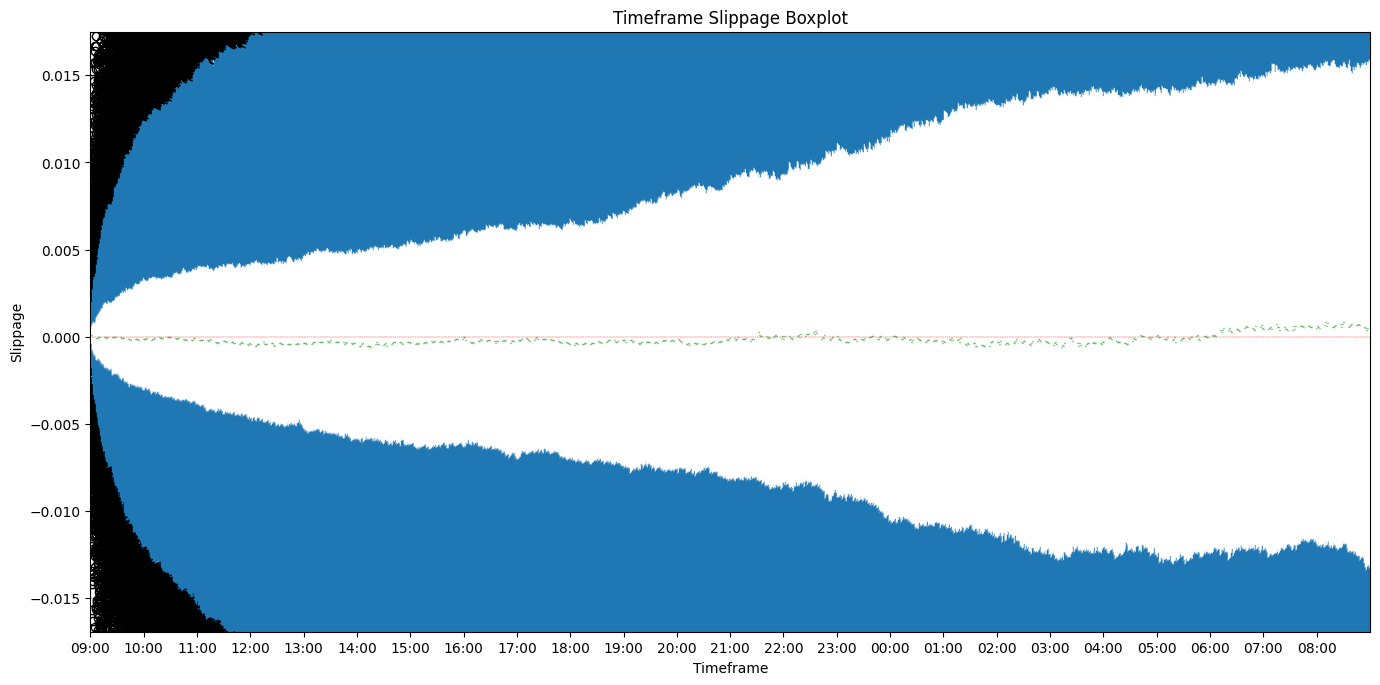

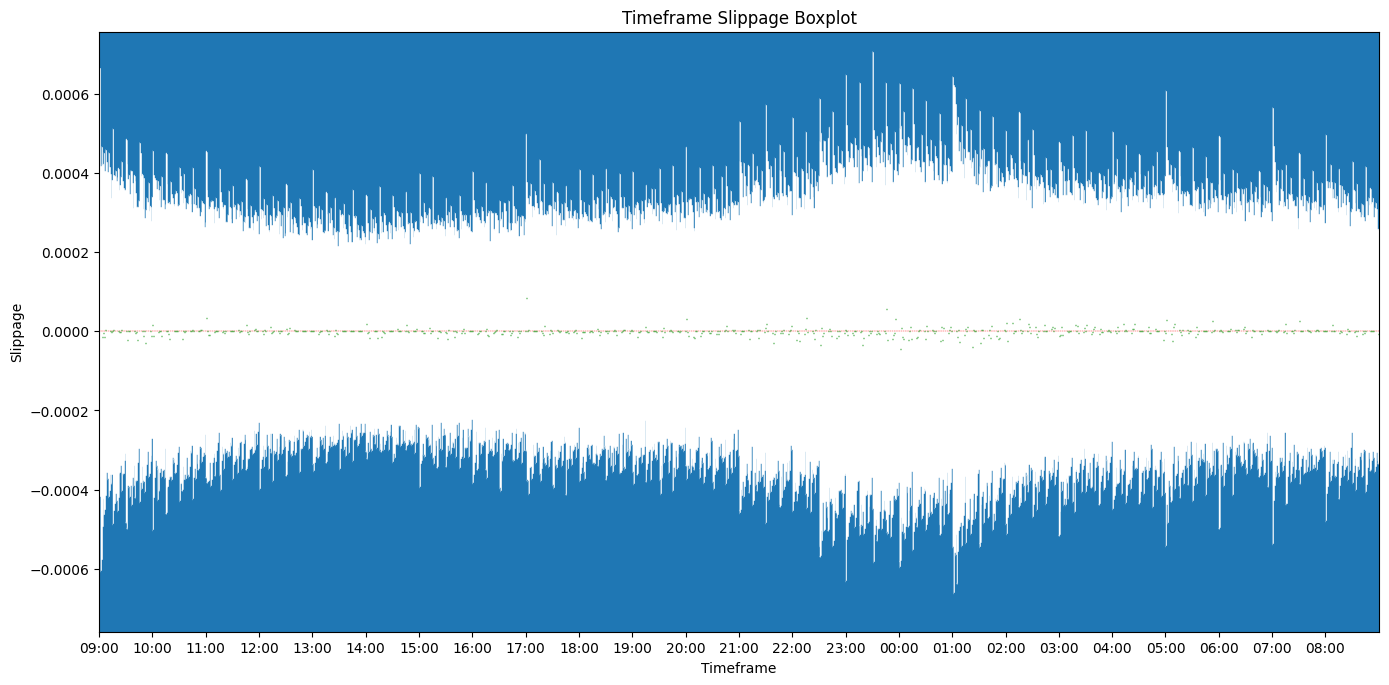

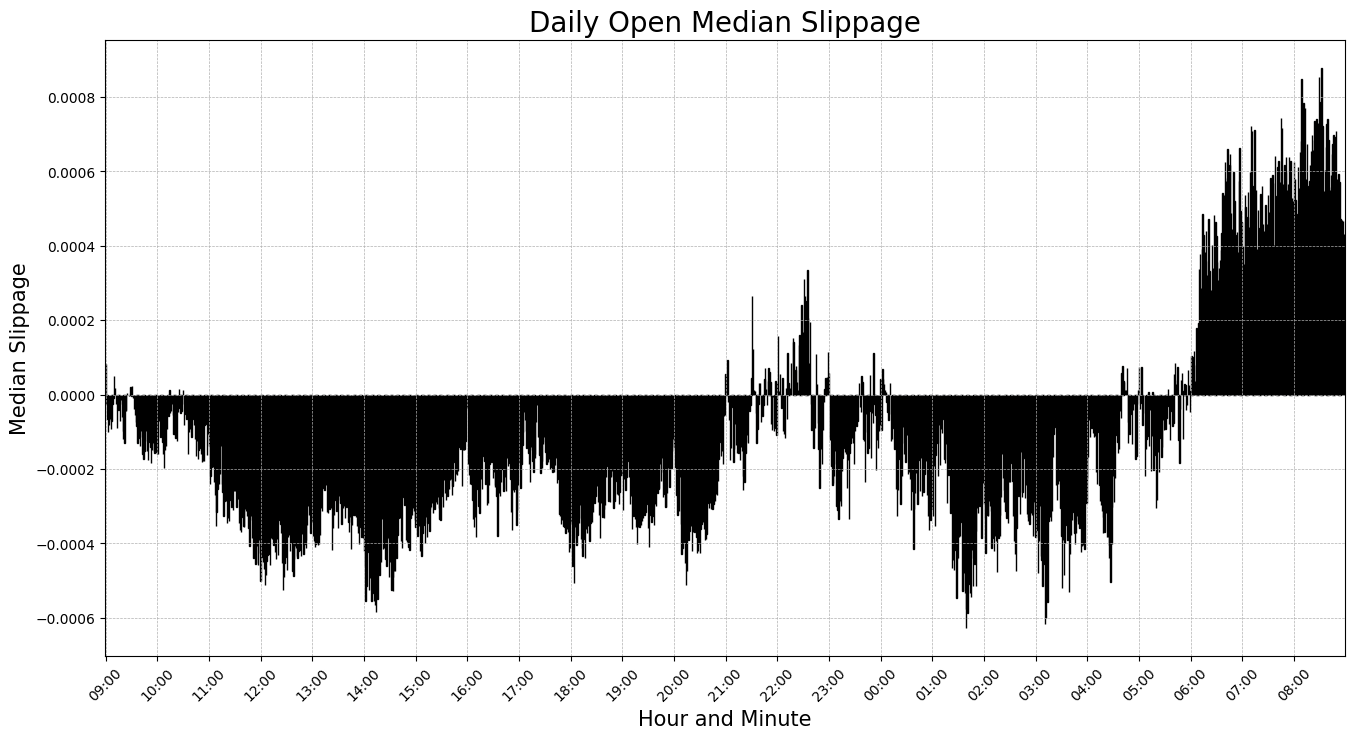

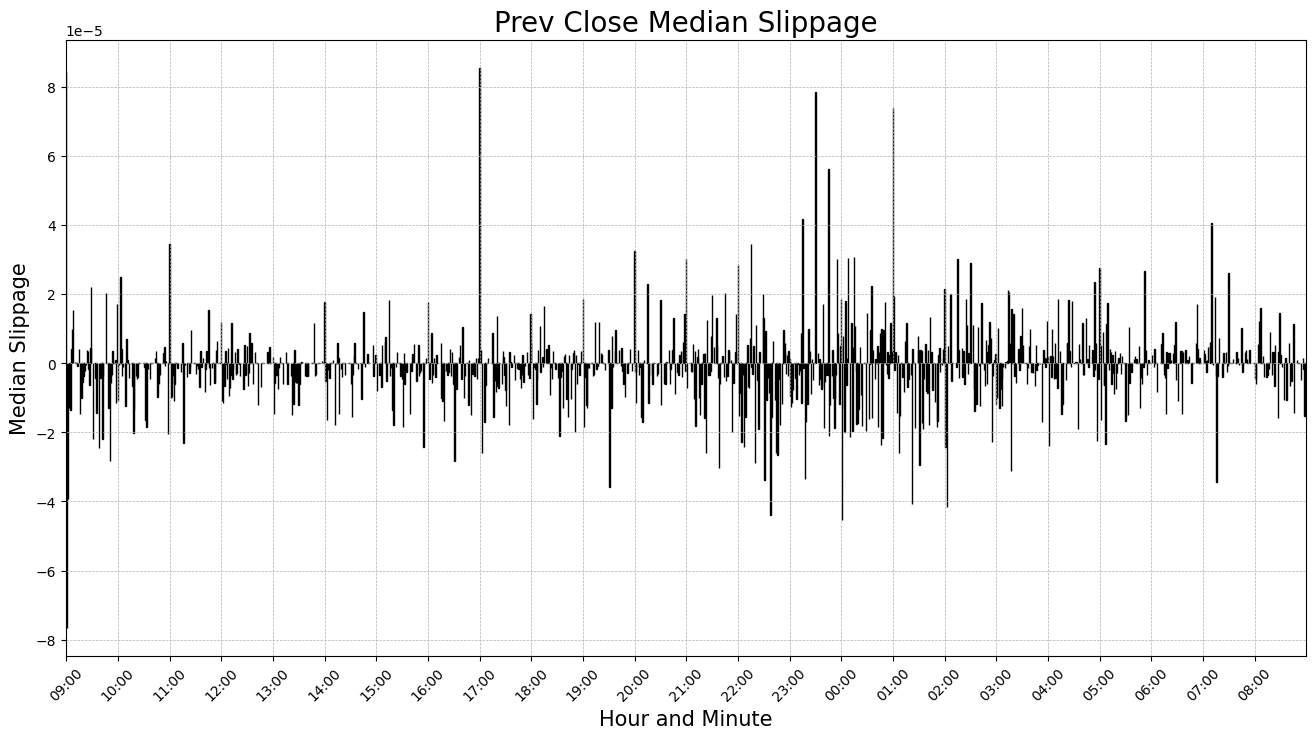

In [8]:
df = fetch_binance_futures_data("BTCUSDT", '1m')

df['returns'] = df['Close'].pct_change()
df['prev_Close'] = df['Close'].shift(1)

df['day'] = df.index.day
df['hour'] = df.index.hour
df['minute'] = df.index.minute

except_date = (df.index[0].date() + pd.Timedelta(days=1)).strftime('%Y-%m-%d')
df = df.loc[except_date:]

df = pd.merge(df, df['Open'].resample('1d').first().rename('daily_open'), left_index=True, right_index=True, how='left').ffill()

# close - daily_open
df['daily_open_slippage'] = (df['Close'] - df['daily_open'])/df['daily_open']

# close - prev_close
df['prev_close_slippage'] = (df['Close'] - df['prev_Close'])/df['prev_Close']

# 1분봉
def plot_slippage_boxplot(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 0.6 * iqr
    upper_bound = q3 + 0.6 * iqr

    df.boxplot(column=column_name, by=['hour', 'minute'], figsize=(16, 8), boxprops=dict(color='white'))
    plt.ylim(lower_bound, upper_bound)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=0.3)
    plt.title("Timeframe Slippage Boxplot")
    plt.suptitle('')
    plt.xlabel('Timeframe')
    plt.ylabel('Slippage')
    plt.xticks(ticks=range(0, 1440, 60), labels=[f'{((h//60)+9)%24:02d}:{h%60:02d}' for h in range(0, 1440, 60)])
    plt.show()

# 시간별 슬리피지 박스플랏
plot_slippage_boxplot(df, 'daily_open_slippage')
plot_slippage_boxplot(df, 'prev_close_slippage')

# 1분봉
def plot_median_slippage(df, column_name, title):
    ax = df.groupby(['hour', 'minute'])[column_name].median().plot(kind='bar', figsize=(16, 8), color='skyblue', edgecolor='black')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Hour and Minute', fontsize=15)
    ax.set_ylabel('Median Slippage', fontsize=15)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(ticks=range(0, len(df.groupby(['hour', 'minute'])), 60), labels=[f'{((h//60)+9)%24:02d}:{h%60:02d}' for h in range(0, 1440, 60)], rotation=45)
    plt.show()

# median값들만
plot_median_slippage(df, 'daily_open_slippage', 'Daily Open Median Slippage')
plot_median_slippage(df, 'prev_close_slippage', 'Prev Close Median Slippage')